# Extracting tiff from dcm

In [1]:
import os
import pydicom
import cv2
import numpy as np

# Paths
input_folder = "20211009"  # Folder containing DICOM files
output_folder = "20211009_TIFF"  # Folder to store extracted TIFF images

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all DICOM (.dcm) files in the input folder
dcm_files = [f for f in os.listdir(input_folder) if f.endswith('.dcm')]
dcm_files.sort()  # Sort files to maintain order

# Process each DICOM file
for dcm_file in dcm_files:
    dcm_path = os.path.join(input_folder, dcm_file)

    # Read DICOM file
    dicom_data = pydicom.dcmread(dcm_path)

    # Convert DICOM pixel data to NumPy array
    image = dicom_data.pixel_array.astype(np.float32)

    # Normalize pixel values to 8-bit (0-255) for saving as TIFF
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Define output TIFF filename
    tiff_filename = os.path.splitext(dcm_file)[0] + ".tiff"
    tiff_path = os.path.join(output_folder, tiff_filename)

    # Save the extracted image as TIFF
    cv2.imwrite(tiff_path, image)

    print(f"Saved: {tiff_path}")

print("All DICOM images have been converted to TIFF and stored in", output_folder)


C:\Users\ATripathi2\AppData\Local\anaconda3\envs\open3d_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ATripathi2\AppData\Local\anaconda3\envs\open3d_env\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ATripathi2\AppData\Local\anaconda3\envs\open3d_env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Saved: 20211009_TIFF\111.1000.1421.1421.0.tiff
Saved: 20211009_TIFF\111.1001.1422.1422.0.tiff
Saved: 20211009_TIFF\111.1002.1423.1423.0.tiff
Saved: 20211009_TIFF\111.1003.1424.1424.0.tiff
Saved: 20211009_TIFF\111.1004.1425.1425.0.tiff
Saved: 20211009_TIFF\111.1005.1426.1426.0.tiff
Saved: 20211009_TIFF\111.1006.1427.1427.0.tiff
Saved: 20211009_TIFF\111.1007.1428.1428.0.tiff
Saved: 20211009_TIFF\111.1008.1429.1429.0.tiff
Saved: 20211009_TIFF\111.1009.1430.1430.0.tiff
Saved: 20211009_TIFF\111.1010.1431.1431.0.tiff
Saved: 20211009_TIFF\111.1011.1432.1432.0.tiff
Saved: 20211009_TIFF\111.1012.1433.1433.0.tiff
Saved: 20211009_TIFF\111.1013.1434.1434.0.tiff
Saved: 20211009_TIFF\111.1014.1435.1435.0.tiff
Saved: 20211009_TIFF\111.1015.1436.1436.0.tiff
Saved: 20211009_TIFF\111.1016.1437.1437.0.tiff
Saved: 20211009_TIFF\111.1017.1438.1438.0.tiff
Saved: 20211009_TIFF\111.1018.1439.1439.0.tiff
Saved: 20211009_TIFF\111.1019.1440.1440.0.tiff
Saved: 20211009_TIFF\111.1020.1441.1441.0.tiff
Saved: 202110

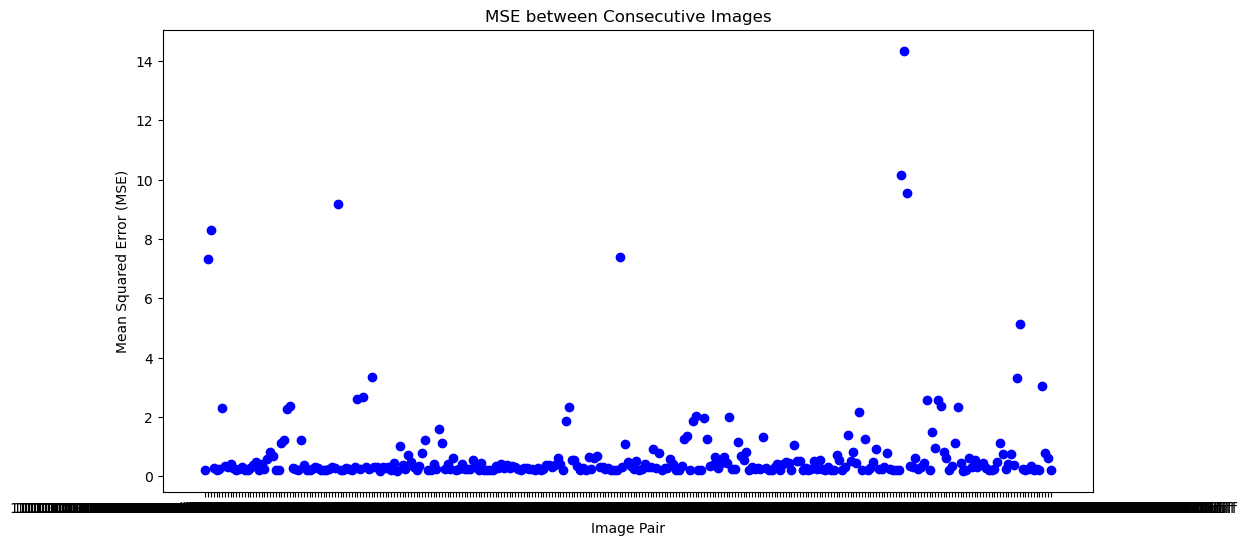

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to compute the Mean Squared Error (MSE) between two images
def compute_mse(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for MSE calculation.")
    mse = np.mean((image1 - image2) ** 2)
    return mse

# Path to the folder containing TIFF images
folder_path = '20211009_TIFF'

# List all TIFF files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
image_files.sort()  # Sort files to ensure consecutive order

# Read images and calculate MSE for each consecutive pair
previous_image = None
mse_values = []
image_pairs = []

for i, filename in enumerate(image_files):
    image_path = os.path.join(folder_path, filename)
    current_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if previous_image is not None:
        # Compute MSE between previous and current image
        mse = compute_mse(previous_image, current_image)
        mse_values.append(mse)
        image_pairs.append(f'{image_files[i-1]} vs {filename}')
    
    # Update previous_image
    previous_image = current_image

# Plot the MSE values
plt.figure(figsize=(12, 6))
plt.scatter(image_pairs, mse_values, color='b', marker='o')
plt.title('MSE between Consecutive Images')
plt.xlabel('Image Pair')
plt.ylabel('Mean Squared Error (MSE)')
#plt.xticks(rotation=90)  # Rotate x-axis labels for readability
#plt.grid(True)
#plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [3]:
# Print image pairs with MSE > 5
threshold = 5
for pair, mse in zip(image_pairs, mse_values):
    if mse > threshold:
        print(f"Image pair: {pair}, MSE: {mse}")

Image pair: 111.1001.1422.1422.0.tiff vs 111.1002.1423.1423.0.tiff, MSE: 7.338366826375325
Image pair: 111.1002.1423.1423.0.tiff vs 111.1003.1424.1424.0.tiff, MSE: 8.297945340474447
Image pair: 111.1051.1472.1472.0.tiff vs 111.548.969.969.0.tiff, MSE: 9.18070019616021
Image pair: 111.647.1068.1068.0.tiff vs 111.648.1069.1069.0.tiff, MSE: 7.3839084837171765
Image pair: 111.747.1168.1168.0.tiff vs 111.748.1169.1169.0.tiff, MSE: 10.158944023980034
Image pair: 111.748.1169.1169.0.tiff vs 111.749.1170.1170.0.tiff, MSE: 14.33961370256212
Image pair: 111.749.1170.1170.0.tiff vs 111.750.1171.1171.0.tiff, MSE: 9.557554244995117
Image pair: 111.789.1210.1210.0.tiff vs 111.790.1211.1211.0.tiff, MSE: 5.120168050130208


# Blurness

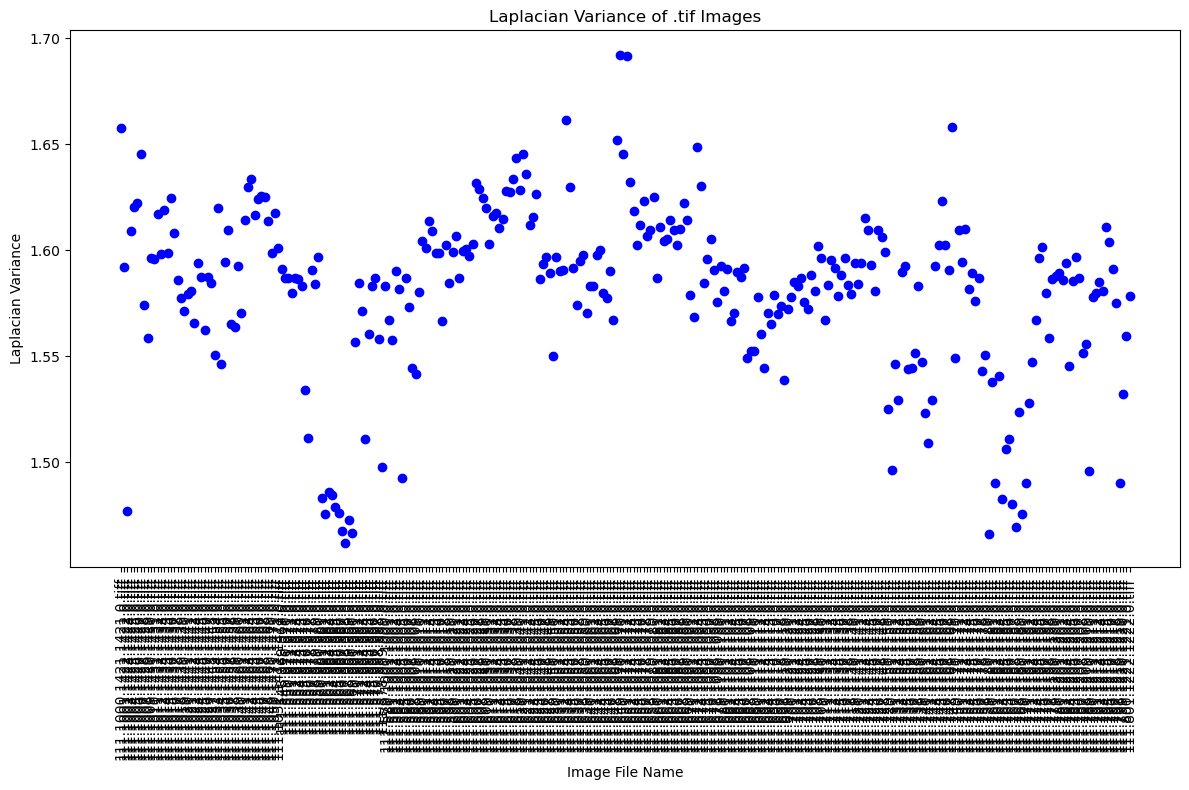

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image):
    """
    Calculate the variance of the Laplacian of the image.
    A lower variance indicates a blurrier image.
    """
    # Convert image to float32 for Laplacian transform
    #image = np.asarray(image, dtype=np.float32)
    
    # Apply Laplacian Transform
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    # Calculate the variance of the Laplacian
    variance = laplacian.var()
    return variance

def process_images(folder_path):
    """
    Process all .tif images in the given folder and extract Laplacian variance.
    """
    # List all .tif files in the directory
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    
    if not files:
        print("No .tif files found in the directory.")
        return
    
    # Dictionary to store results
    results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        #print(f"Processing {file_path}...")
        
        # Read the .tif image using OpenCV
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read as-is

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue
        
        # Convert to grayscale if it's not already
        if len(image.shape) == 3:  # RGB or RGBA
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Ensure the image is in 2D (grayscale)
        if len(image.shape) != 2:
            print(f"{file} is not a valid grayscale image. Skipping.")
            continue
        
        # Convert 16-bit to 8-bit if necessary
        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))
        
        # Calculate the Laplacian variance
        variance = calculate_laplacian_variance(image)
        
        # Store the result
        results[file] = variance

    # Plot the results
    plt.figure(figsize=(12, 8))
    image_names = list(results.keys())
    variances = list(results.values())
    
    plt.scatter(image_names, variances, color='blue', marker='o')
    plt.xlabel('Image File Name')
    plt.ylabel('Laplacian Variance')
    plt.title('Laplacian Variance of .tif Images')
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.tight_layout()  # Adjust layout to fit labels
    #plt.grid(True)  # Add grid for better readability
    plt.show()

# Replace 'your_folder_path' with the path to your folder containing .tif images
process_images('20211009_TIFF')


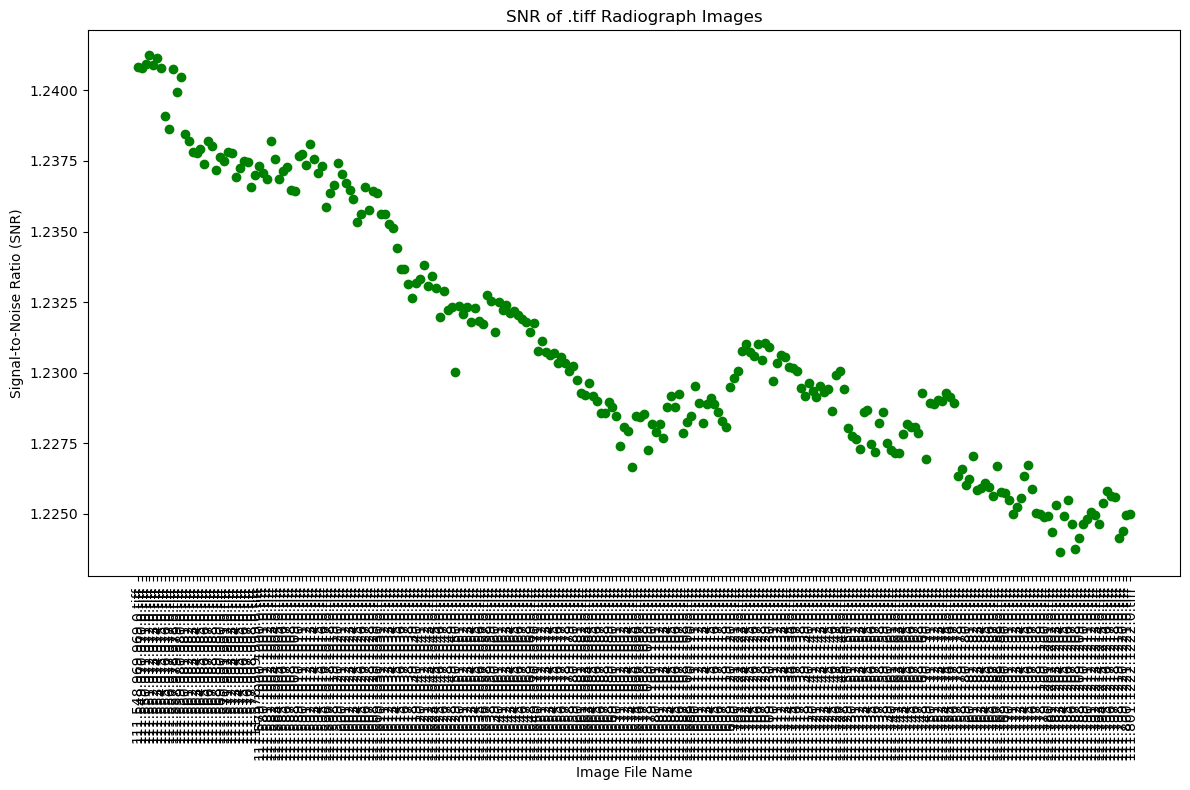

In [12]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_snr(image):
    """
    Calculates the Signal-to-Noise Ratio (SNR) of an image.
    SNR = mean / standard deviation
    """
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    if std_noise == 0:
        return float('inf')  # Avoid division by zero
    return mean_signal / std_noise

def process_snr_images(folder_path):
    """
    Process all .tiff images in the given folder and calculate SNR.
    """
    # List all .tiff files in the directory
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    
    if not files:
        print("No .tiff files found in the directory.")
        return
    
    snr_results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue

        # Convert to grayscale if needed
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Convert 16-bit to 8-bit if necessary
        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))
        
        snr_value = calculate_snr(image)
        snr_results[file] = snr_value

    # Plot the results
    plt.figure(figsize=(12, 8))
    image_names = list(snr_results.keys())
    snr_values = list(snr_results.values())

    plt.scatter(image_names, snr_values, color='green', marker='o')
    plt.xlabel('Image File Name')
    plt.ylabel('Signal-to-Noise Ratio (SNR)')
    plt.title('SNR of .tiff Radiograph Images')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Update this with the path to your folder
process_snr_images('20211009_TIFF')



Comparing SNRs between consecutive images:
111.548.969.969.0.tiff → 111.549.970.970.0.tiff : ΔSNR = -0.0000
111.549.970.970.0.tiff → 111.550.971.971.0.tiff : ΔSNR = 0.0001
111.550.971.971.0.tiff → 111.551.972.972.0.tiff : ΔSNR = 0.0003
111.551.972.972.0.tiff → 111.552.973.973.0.tiff : ΔSNR = -0.0004
111.552.973.973.0.tiff → 111.553.974.974.0.tiff : ΔSNR = 0.0002
111.553.974.974.0.tiff → 111.554.975.975.0.tiff : ΔSNR = -0.0003
111.554.975.975.0.tiff → 111.555.976.976.0.tiff : ΔSNR = -0.0017
111.555.976.976.0.tiff → 111.556.977.977.0.tiff : ΔSNR = -0.0005
111.556.977.977.0.tiff → 111.557.978.978.0.tiff : ΔSNR = 0.0021
111.557.978.978.0.tiff → 111.558.979.979.0.tiff : ΔSNR = -0.0008
111.558.979.979.0.tiff → 111.559.980.980.0.tiff : ΔSNR = 0.0005
111.559.980.980.0.tiff → 111.560.981.981.0.tiff : ΔSNR = -0.0020
111.560.981.981.0.tiff → 111.561.982.982.0.tiff : ΔSNR = -0.0002
111.561.982.982.0.tiff → 111.562.983.983.0.tiff : ΔSNR = -0.0004
111.562.983.983.0.tiff → 111.563.984.984.0.tiff : Δ

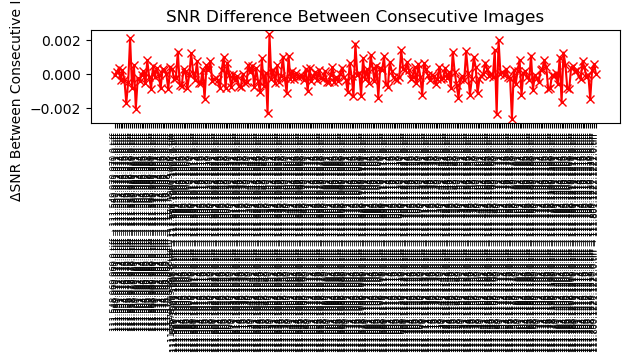

In [21]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_snr(image):
    """
    Calculates the Signal-to-Noise Ratio (SNR) of an image.
    SNR = mean / standard deviation
    """
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    if std_noise == 0:
        return float('inf')
    return mean_signal / std_noise

def process_snr_images(folder_path):
    """
    Process all .tiff images in the folder, calculate SNRs, 
    compare consecutive SNRs, and plot both SNR and ΔSNR.
    """
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tiff')])
    if not files:
        print("No .tiff files found in the directory.")
        return

    snr_results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue

        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))

        snr_value = calculate_snr(image)
        snr_results[file] = snr_value
        #print(f"{file}: SNR = {snr_value:.4f}")

    # Compare consecutive SNRs
    print("\nComparing SNRs between consecutive images:")
    snr_items = list(snr_results.items())
    delta_snr = []
    labels = []

    for i in range(1, len(snr_items)):
        prev_file, prev_snr = snr_items[i - 1]
        curr_file, curr_snr = snr_items[i]
        diff = curr_snr - prev_snr
        delta_snr.append(diff)
        labels.append(f"{prev_file} → {curr_file}")
        print(f"{prev_file} → {curr_file} : ΔSNR = {diff:.4f}")

    # # Plot individual SNRs
    # plt.figure(figsize=(14, 6))
    # plt.subplot(2, 1, 1)
    # image_names = list(snr_results.keys())
    # snr_values = list(snr_results.values())
    # plt.plot(image_names, snr_values, marker='o', color='blue')
    # plt.xticks(rotation=90, fontsize=6)
    # plt.ylabel('SNR')
    # plt.title('SNR of Radiograph Images')

    # Plot ΔSNRs
    plt.subplot(2, 1, 2)
    plt.plot(labels, delta_snr, marker='x', color='red')
    plt.xticks(rotation=90, fontsize=6)
    plt.ylabel('ΔSNR Between Consecutive Images')
    plt.title('SNR Difference Between Consecutive Images')
    plt.tight_layout()
    plt.show()

# Example Usage
process_snr_images('20211009_TIFF')


PSNR between '111.548.969.969.0.tiff' and '111.549.970.970.0.tiff': 54.94 dB
PSNR between '111.549.970.970.0.tiff' and '111.550.971.971.0.tiff': 54.57 dB
PSNR between '111.550.971.971.0.tiff' and '111.551.972.972.0.tiff': 53.46 dB
PSNR between '111.551.972.972.0.tiff' and '111.552.973.973.0.tiff': 54.04 dB
PSNR between '111.552.973.973.0.tiff' and '111.553.974.974.0.tiff': 54.89 dB
PSNR between '111.553.974.974.0.tiff' and '111.554.975.975.0.tiff': 52.99 dB
PSNR between '111.554.975.975.0.tiff' and '111.555.976.976.0.tiff': 43.99 dB
PSNR between '111.555.976.976.0.tiff' and '111.556.977.977.0.tiff': 53.92 dB
PSNR between '111.556.977.977.0.tiff' and '111.557.978.978.0.tiff': 43.88 dB
PSNR between '111.557.978.978.0.tiff' and '111.558.979.979.0.tiff': 53.14 dB
PSNR between '111.558.979.979.0.tiff' and '111.559.980.980.0.tiff': 54.10 dB
PSNR between '111.559.980.980.0.tiff' and '111.560.981.981.0.tiff': 42.88 dB
PSNR between '111.560.981.981.0.tiff' and '111.561.982.982.0.tiff': 53.31 dB

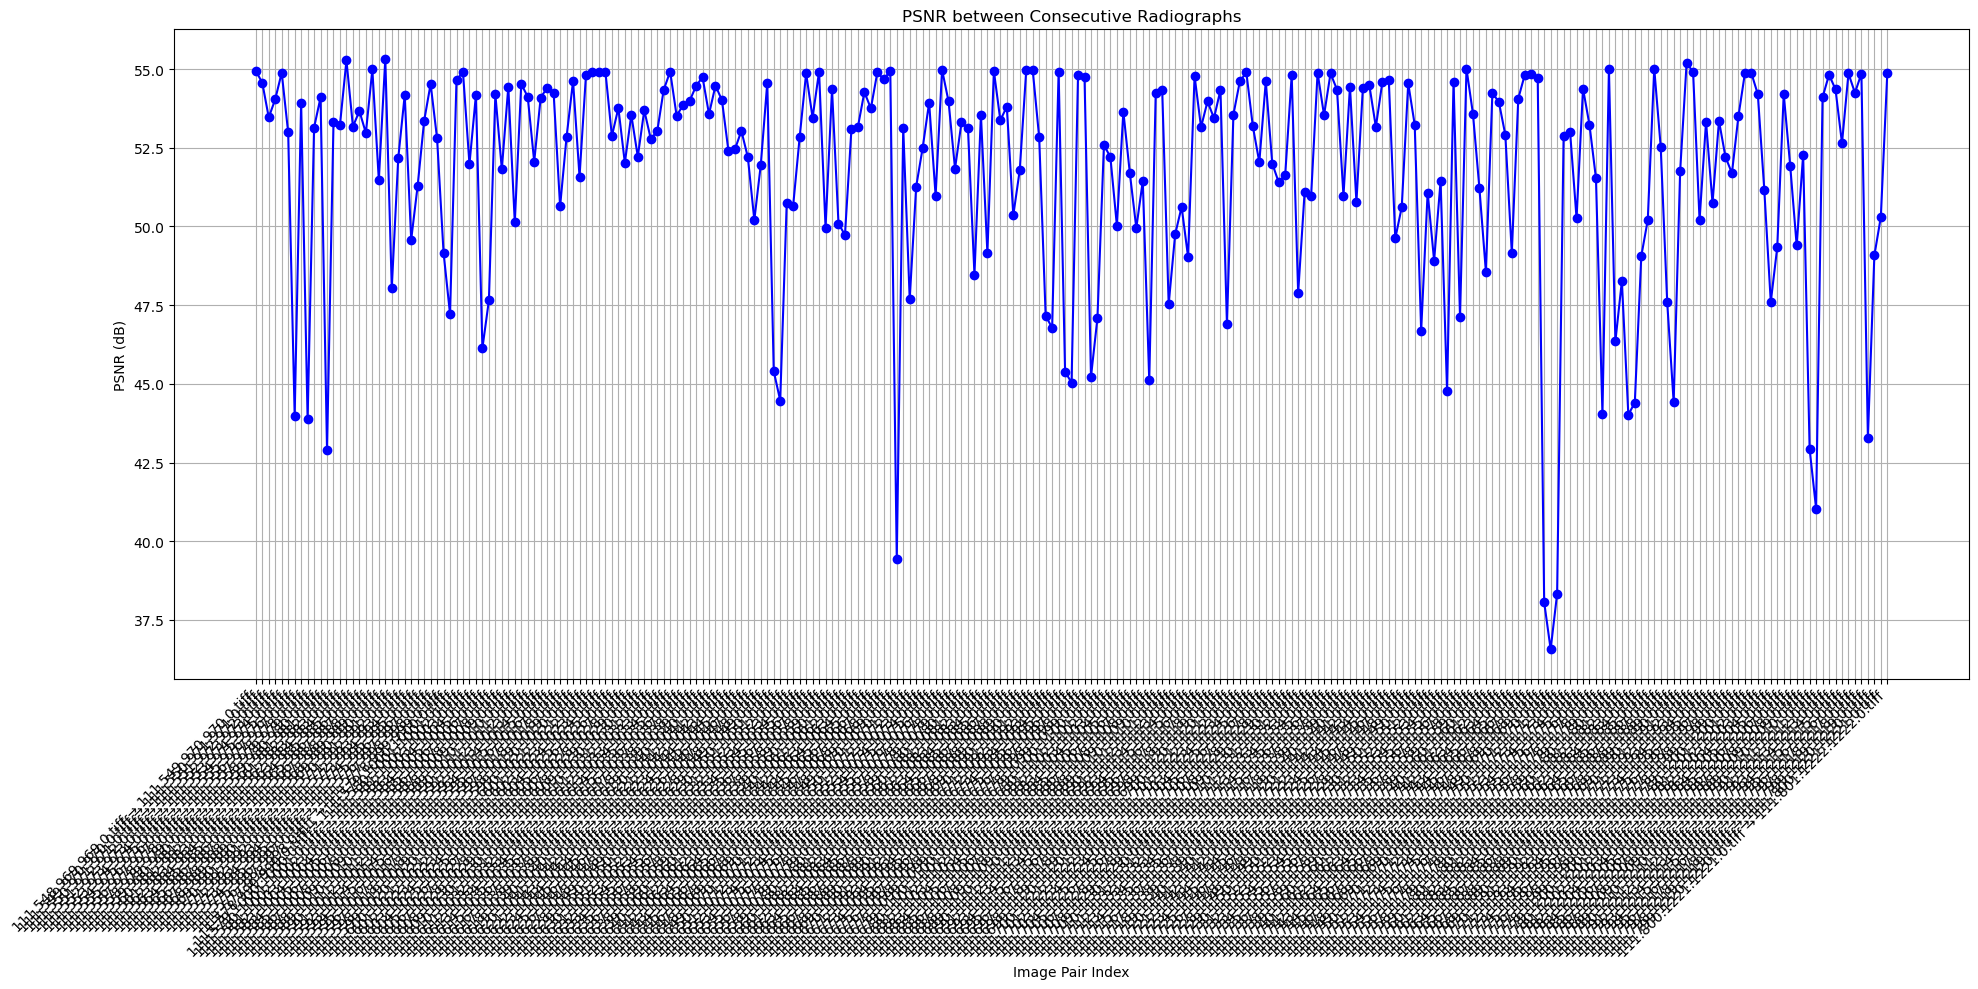

In [28]:
import os
import cv2
import math
import matplotlib.pyplot as plt

def calculate_psnr(img1, img2):
    mse = ((img1.astype("float") - img2.astype("float")) ** 2).mean()
    if mse == 0:
        return float('inf')  # identical images
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def compare_folder_images_psnr_with_plot(folder_path):
    image_files = sorted([
        f for f in os.listdir(folder_path)
        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))
    ])

    if len(image_files) < 2:
        print("Not enough images to compare.")
        return

    psnr_values = []
    image_pairs = []

    previous_image = None
    for i, filename in enumerate(image_files):
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if previous_image is not None:
            psnr = calculate_psnr(previous_image, img)
            psnr_values.append(psnr)
            image_pairs.append(f"{image_files[i-1]} → {filename}")
            print(f"PSNR between '{image_files[i-1]}' and '{filename}': {psnr:.2f} dB")

        previous_image = img

    # Plotting
    plt.figure(figsize=(20, 10))
    plt.plot(psnr_values, marker='o', linestyle='-', color='b')
    plt.title("PSNR between Consecutive Radiographs")
    plt.xlabel("Image Pair Index")
    plt.ylabel("PSNR (dB)")
    plt.grid(True)
    plt.xticks(ticks=range(len(image_pairs)), labels=image_pairs, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
compare_folder_images_psnr_with_plot("20211009_TIFF")


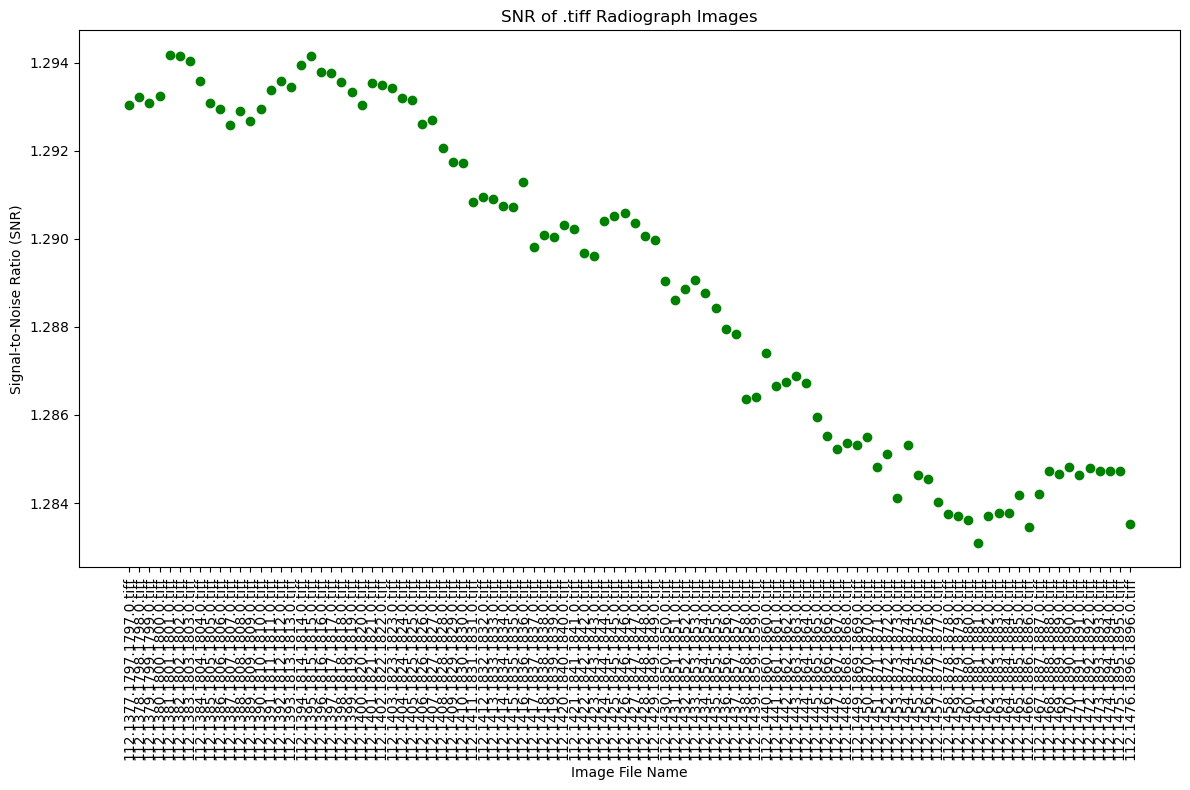

In [16]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_snr(image):
    """
    Calculates the Signal-to-Noise Ratio (SNR) of an image.
    SNR = mean / standard deviation
    """
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    if std_noise == 0:
        return float('inf')  # Avoid division by zero
    return mean_signal / std_noise

def process_snr_images(folder_path):
    """
    Process all .tiff images in the given folder and calculate SNR.
    """
    # List all .tiff files in the directory
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    
    if not files:
        print("No .tiff files found in the directory.")
        return
    
    snr_results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue

        # Convert to grayscale if needed
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Convert 16-bit to 8-bit if necessary
        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))
        
        snr_value = calculate_snr(image)
        snr_results[file] = snr_value

    # Plot the results
    plt.figure(figsize=(12, 8))
    image_names = list(snr_results.keys())
    snr_values = list(snr_results.values())

    plt.scatter(image_names, snr_values, color='green', marker='o')
    plt.xlabel('Image File Name')
    plt.ylabel('Signal-to-Noise Ratio (SNR)')
    plt.title('SNR of .tiff Radiograph Images')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Update this with the path to your folder
process_snr_images('SCAN 2/SCAN2_1-100_TIFF')


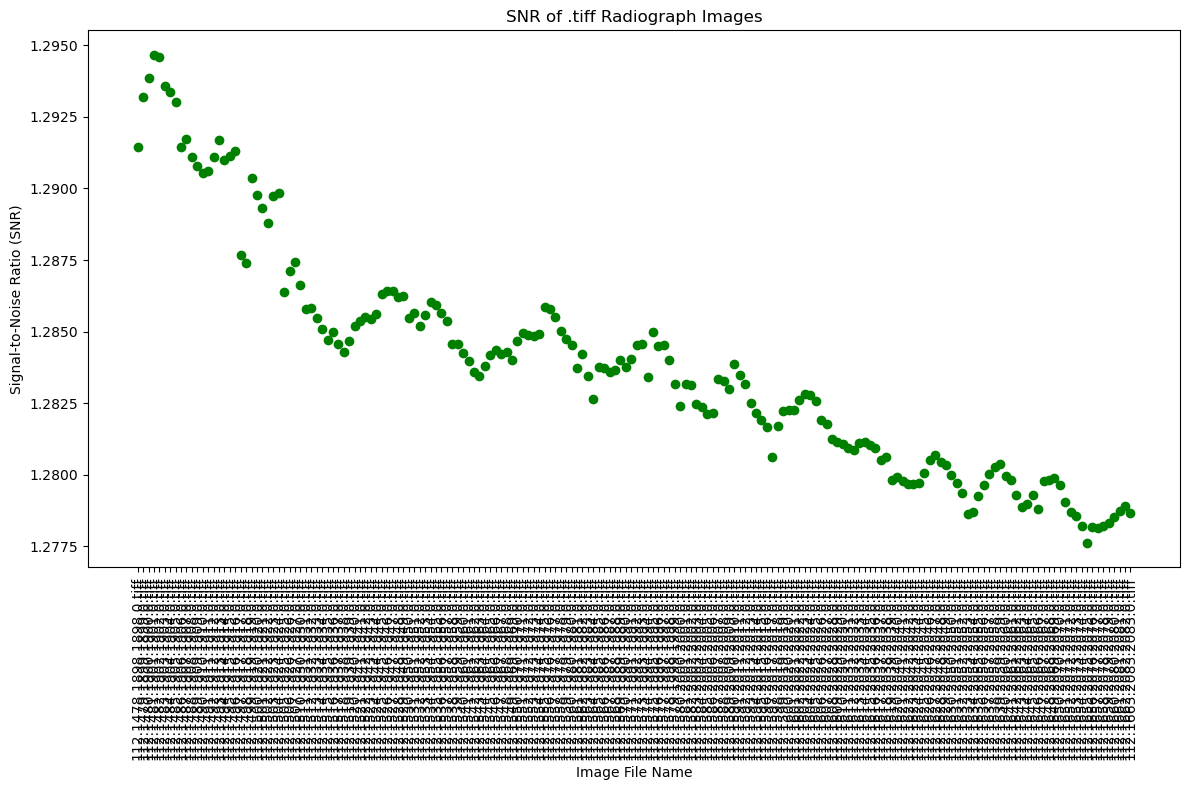

In [17]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_snr(image):
    """
    Calculates the Signal-to-Noise Ratio (SNR) of an image.
    SNR = mean / standard deviation
    """
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    if std_noise == 0:
        return float('inf')  # Avoid division by zero
    return mean_signal / std_noise

def process_snr_images(folder_path):
    """
    Process all .tiff images in the given folder and calculate SNR.
    """
    # List all .tiff files in the directory
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    
    if not files:
        print("No .tiff files found in the directory.")
        return
    
    snr_results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue

        # Convert to grayscale if needed
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Convert 16-bit to 8-bit if necessary
        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))
        
        snr_value = calculate_snr(image)
        snr_results[file] = snr_value

    # Plot the results
    plt.figure(figsize=(12, 8))
    image_names = list(snr_results.keys())
    snr_values = list(snr_results.values())

    plt.scatter(image_names, snr_values, color='green', marker='o')
    plt.xlabel('Image File Name')
    plt.ylabel('Signal-to-Noise Ratio (SNR)')
    plt.title('SNR of .tiff Radiograph Images')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Update this with the path to your folder
process_snr_images('SCAN 2/SCAN2 _101-190_TIFF')


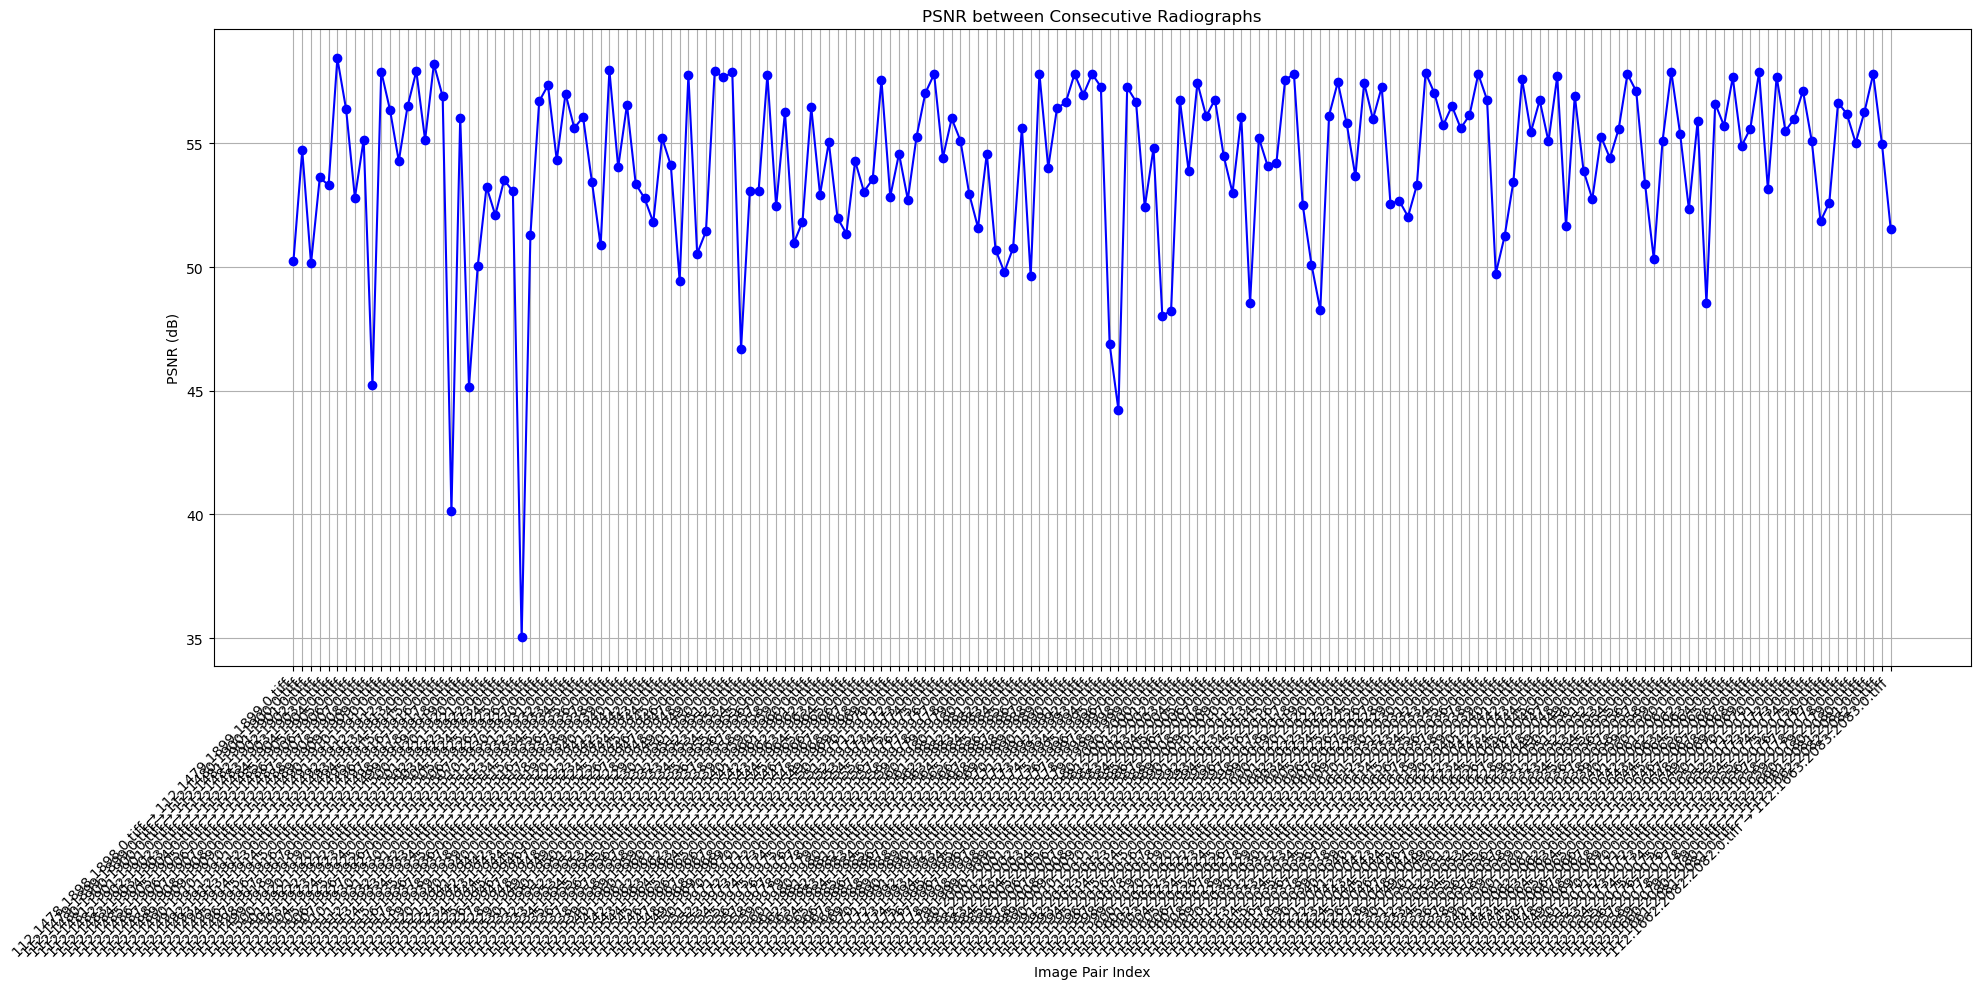

In [30]:
import os
import cv2
import math
import matplotlib.pyplot as plt

def calculate_psnr(img1, img2):
    mse = ((img1.astype("float") - img2.astype("float")) ** 2).mean()
    if mse == 0:
        return float('inf')  # identical images
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def compare_folder_images_psnr_with_plot(folder_path):
    image_files = sorted([
        f for f in os.listdir(folder_path)
        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))
    ])

    if len(image_files) < 2:
        print("Not enough images to compare.")
        return

    psnr_values = []
    image_pairs = []

    previous_image = None
    for i, filename in enumerate(image_files):
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if previous_image is not None:
            psnr = calculate_psnr(previous_image, img)
            psnr_values.append(psnr)
            image_pairs.append(f"{image_files[i-1]} → {filename}")
            #print(f"PSNR between '{image_files[i-1]}' and '{filename}': {psnr:.2f} dB")

        previous_image = img

    # Plotting
    plt.figure(figsize=(20, 10))
    plt.plot(psnr_values, marker='o', linestyle='-', color='b')
    plt.title("PSNR between Consecutive Radiographs")
    plt.xlabel("Image Pair Index")
    plt.ylabel("PSNR (dB)")
    plt.grid(True)
    plt.xticks(ticks=range(len(image_pairs)), labels=image_pairs, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
compare_folder_images_psnr_with_plot("SCAN 2/SCAN2 _101-190_TIFF")


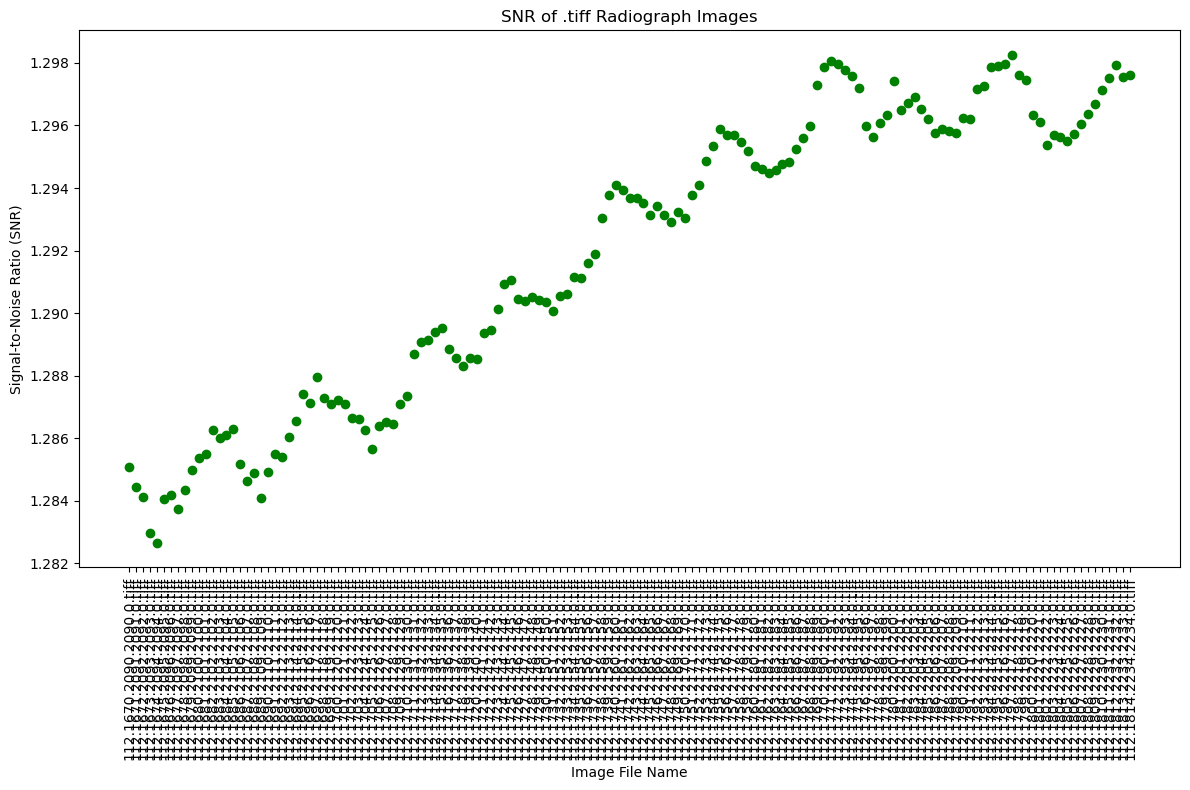

In [18]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_snr(image):
    """
    Calculates the Signal-to-Noise Ratio (SNR) of an image.
    SNR = mean / standard deviation
    """
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    if std_noise == 0:
        return float('inf')  # Avoid division by zero
    return mean_signal / std_noise

def process_snr_images(folder_path):
    """
    Process all .tiff images in the given folder and calculate SNR.
    """
    # List all .tiff files in the directory
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    
    if not files:
        print("No .tiff files found in the directory.")
        return
    
    snr_results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue

        # Convert to grayscale if needed
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Convert 16-bit to 8-bit if necessary
        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))
        
        snr_value = calculate_snr(image)
        snr_results[file] = snr_value

    # Plot the results
    plt.figure(figsize=(12, 8))
    image_names = list(snr_results.keys())
    snr_values = list(snr_results.values())

    plt.scatter(image_names, snr_values, color='green', marker='o')
    plt.xlabel('Image File Name')
    plt.ylabel('Signal-to-Noise Ratio (SNR)')
    plt.title('SNR of .tiff Radiograph Images')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Update this with the path to your folder
process_snr_images('SCAN 2/SCAN2 191-335_TIFF')


111.1000.1421.1421.0.tiff: SNR = 1.2319
111.1001.1422.1422.0.tiff: SNR = 1.2318
111.1002.1423.1423.0.tiff: SNR = 1.2302
111.1003.1424.1424.0.tiff: SNR = 1.2317
111.1004.1425.1425.0.tiff: SNR = 1.2321
111.1005.1426.1426.0.tiff: SNR = 1.2318
111.1006.1427.1427.0.tiff: SNR = 1.2320
111.1007.1428.1428.0.tiff: SNR = 1.2299
111.1008.1429.1429.0.tiff: SNR = 1.2305
111.1009.1430.1430.0.tiff: SNR = 1.2310
111.1010.1431.1431.0.tiff: SNR = 1.2315
111.1011.1432.1432.0.tiff: SNR = 1.2317
111.1012.1433.1433.0.tiff: SNR = 1.2316
111.1013.1434.1434.0.tiff: SNR = 1.2321
111.1014.1435.1435.0.tiff: SNR = 1.2316
111.1015.1436.1436.0.tiff: SNR = 1.2316
111.1016.1437.1437.0.tiff: SNR = 1.2313
111.1017.1438.1438.0.tiff: SNR = 1.2317
111.1018.1439.1439.0.tiff: SNR = 1.2311
111.1019.1440.1440.0.tiff: SNR = 1.2320
111.1020.1441.1441.0.tiff: SNR = 1.2318
111.1021.1442.1442.0.tiff: SNR = 1.2315
111.1022.1443.1443.0.tiff: SNR = 1.2309
111.1023.1444.1444.0.tiff: SNR = 1.2317
111.1024.1445.1445.0.tiff: SNR = 1.2307


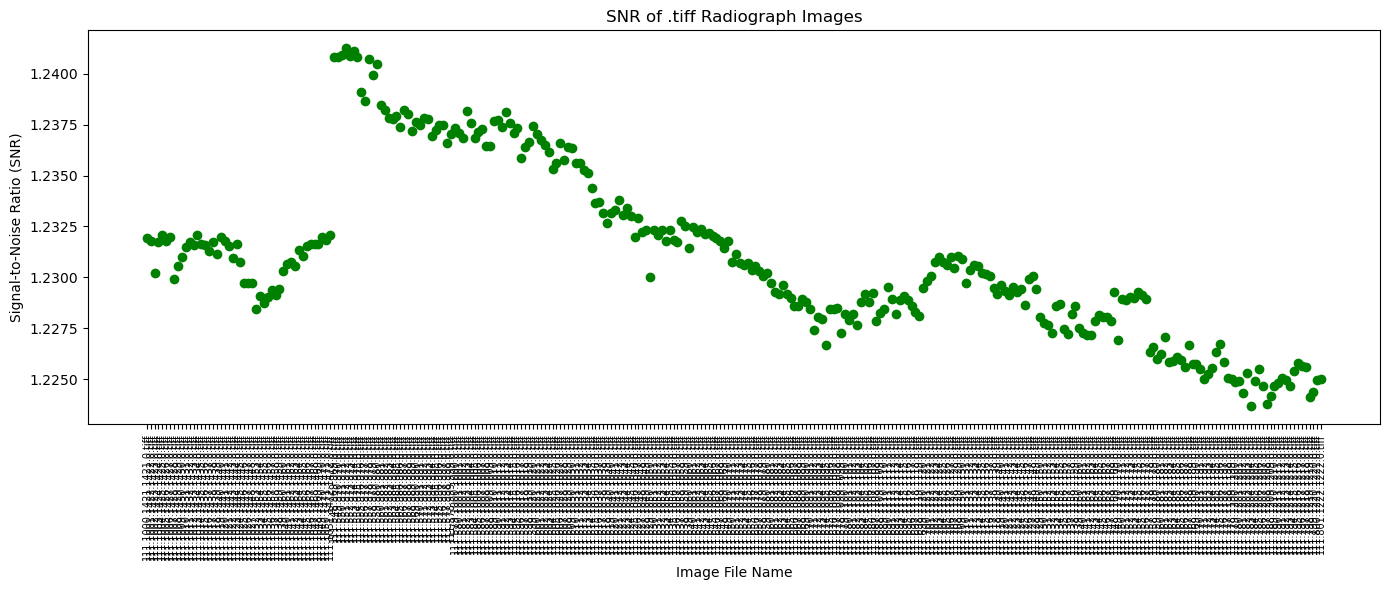

In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_snr(image):
    """
    Calculates the Signal-to-Noise Ratio (SNR) of an image.
    SNR = mean / standard deviation
    """
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    if std_noise == 0:
        return float('inf')
    return mean_signal / std_noise

def process_snr_images(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    if not files:
        print("No .tiff files found in the directory.")
        return

    snr_results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue

        # Convert 16-bit to 8-bit if needed
        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))

        snr_value = calculate_snr(image)
        snr_results[file] = snr_value

        # Print image name with its SNR
        print(f"{file}: SNR = {snr_value:.4f}")

    # Scatter plot of all SNR values
    plt.figure(figsize=(14, 6))
    image_names = list(snr_results.keys())
    snr_values = list(snr_results.values())

    plt.scatter(image_names, snr_values, color='green', marker='o')
    plt.xlabel('Image File Name')
    plt.ylabel('Signal-to-Noise Ratio (SNR)')
    plt.title('SNR of .tiff Radiograph Images')
    plt.xticks(rotation=90, fontsize=7)
    plt.tight_layout()
    plt.show()

# Replace this with your folder path
process_snr_images('20211009_TIFF')


In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_snr(image):
    """
    Calculates the Signal-to-Noise Ratio (SNR) of an image.
    SNR = mean / standard deviation
    """
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    if std_noise == 0:
        return float('inf')
    return mean_signal / std_noise

def calculate_snr_single_image(image_path):
    """
    Calculate and print SNR for a single image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error reading {image_path}")
        return

    if image.dtype == np.uint16:
        image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))

    snr = calculate_snr(image)
    print(f"SNR of {os.path.basename(image_path)}: {snr:.4f}")
    return snr

def process_snr_images(folder_path):
    """
    Process all .tiff images in a folder, print their SNRs, and plot them.
    """
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    if not files:
        print("No .tiff files found in the directory.")
        return

    snr_results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue

        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))

        snr_value = calculate_snr(image)
        snr_results[file] = snr_value
        print(f"{file}: SNR = {snr_value:.4f}")

    # Plot
    plt.figure(figsize=(14, 6))
    image_names = list(snr_results.keys())
    snr_values = list(snr_results.values())

    plt.scatter(image_names, snr_values, color='green', marker='o')
    plt.xlabel('Image File Name')
    plt.ylabel('Signal-to-Noise Ratio (SNR)')
    plt.title('SNR of .tiff Radiograph Images')
    plt.xticks(rotation=90, fontsize=7)
    plt.tight_layout()
    plt.show()

# ---------- Usage Example ----------

# For all images in a folder:
# process_snr_images('20211009_TIFF')

#For a single image:
calculate_snr_single_image('20211009_TIFF/111.748.1169.1169.0.tiff')


SNR of 111.748.1169.1169.0.tiff: 1.2293


1.2292770265031117

In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_snr(image):
    """
    Calculates the Signal-to-Noise Ratio (SNR) of an image.
    SNR = mean / standard deviation
    """
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    if std_noise == 0:
        return float('inf')
    return mean_signal / std_noise

def calculate_snr_single_image(image_path):
    """
    Calculate and print SNR for a single image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error reading {image_path}")
        return

    if image.dtype == np.uint16:
        image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))

    snr = calculate_snr(image)
    print(f"SNR of {os.path.basename(image_path)}: {snr:.4f}")
    return snr

def process_snr_images(folder_path):
    """
    Process all .tiff images in a folder, print their SNRs, and plot them.
    """
    files = [f for f in os.listdir(folder_path) if f.endswith('.tiff')]
    if not files:
        print("No .tiff files found in the directory.")
        return

    snr_results = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading {file_path}. Skipping.")
            continue

        if image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0 / 65535.0))

        snr_value = calculate_snr(image)
        snr_results[file] = snr_value
        print(f"{file}: SNR = {snr_value:.4f}")

    # Plot
    plt.figure(figsize=(14, 6))
    image_names = list(snr_results.keys())
    snr_values = list(snr_results.values())

    plt.scatter(image_names, snr_values, color='green', marker='o')
    plt.xlabel('Image File Name')
    plt.ylabel('Signal-to-Noise Ratio (SNR)')
    plt.title('SNR of .tiff Radiograph Images')
    plt.xticks(rotation=90, fontsize=7)
    plt.tight_layout()
    plt.show()

# ---------- Usage Example ----------

# For all images in a folder:
# process_snr_images('20211009_TIFF')

#For a single image:
calculate_snr_single_image('20211009_TIFF/111.749.1170.1170.0.tiff')


SNR of 111.749.1170.1170.0.tiff: 1.2269


1.2269344740861456